<a href="https://www.kaggle.com/code/gurmolsingh/indian-food-101-analysis?scriptVersionId=126932537" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-food-101/indian_food.csv


In [2]:
df= pd.read_csv('../input/indian-food-101/indian_food.csv')

print(df)


               name                                        ingredients  \
0        Balu shahi                    Maida flour, yogurt, oil, sugar   
1            Boondi                            Gram flour, ghee, sugar   
2    Gajar ka halwa       Carrots, milk, sugar, ghee, cashews, raisins   
3            Ghevar  Flour, ghee, kewra, milk, clarified butter, su...   
4       Gulab jamun  Milk powder, plain flour, baking powder, ghee,...   
..              ...                                                ...   
250       Til Pitha            Glutinous rice, black sesame seeds, gur   
251         Bebinca  Coconut milk, egg yolks, clarified butter, all...   
252          Shufta  Cottage cheese, dry dates, dried rose petals, ...   
253       Mawa Bati  Milk powder, dry fruits, arrowroot powder, all...   
254          Pinaca  Brown rice, fennel seeds, grated coconut, blac...   

           diet  prep_time  cook_time flavor_profile   course  \
0    vegetarian         45         25         

In [3]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [4]:
df.iloc[:,1:3]

,ingredients,diet
0,"Maida flour, yogurt, oil, sugar",vegetarian
1,"Gram flour, ghee, sugar",vegetarian
2,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian
3,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian
4,"Milk powder, plain flour, baking powder, ghee,...",vegetarian
...,...,...
250,"Glutinous rice, black sesame seeds, gur",vegetarian
251,"Coconut milk, egg yolks, clarified butter, all...",vegetarian
252,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian
253,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian


In [5]:
print(df.shape)

(255, 9)


In [6]:
print(df.columns)

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB
None


In [8]:
df.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [10]:
#seeing information on non statistical features
df.describe(include=["ingredients"])

TypeError: data type 'ingredients' not understood

In [11]:
df.sort_values(by="prep_time", ascending=False).head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
114,Pindi chana,"Fennel, tea bags, tomato, kasuri methi, cinnamon",vegetarian,500,120,spicy,main course,Punjab,North
155,Puttu,"Brown rice flour, sugar, grated coconut",vegetarian,495,40,-1,main course,Kerala,South
29,Misti doi,"Milk, jaggery",vegetarian,480,30,sweet,dessert,West Bengal,East
144,Masala Dosa,"Chana dal, urad dal, potatoes, idli rice, thic...",vegetarian,360,90,spicy,snack,-1,South
130,Idli,"Split urad dal, urad dal, idli rice, thick poh...",vegetarian,360,90,spicy,snack,-1,South


In [12]:
null_values = df.isnull().sum()

# Print the null values
print(null_values)

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64


In [13]:
corr_matrix = df.corr()
# Print the correlation matrix
print(corr_matrix)
#can see that download speedn and upload speed has a correlation

           prep_time  cook_time
prep_time   1.000000   0.144113
cook_time   0.144113   1.000000


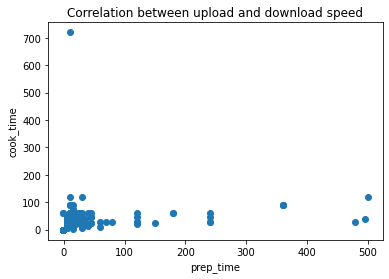

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
x = df['prep_time']
y = df['cook_time']

# Create a scatter plot
plt.scatter(x, y)

# Add labels and title to the plot
plt.xlabel('prep_time')
plt.ylabel('cook_time')
plt.title('Correlation between upload and download speed')

# Show the plot
plt.show()

count    255.000000
mean      34.529412
std       48.265650
min       -1.000000
25%       20.000000
50%       30.000000
75%       40.000000
max      720.000000
Name: cook_time, dtype: float64


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


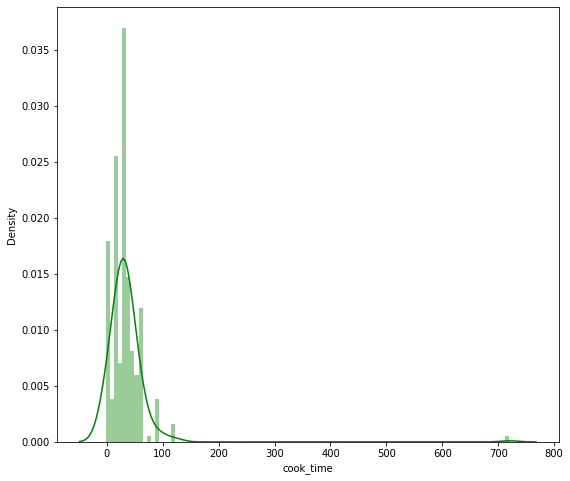

In [15]:
import seaborn as sns
print(df['cook_time'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['cook_time'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [16]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,prep_time,cook_time
0,45,25
1,80,30
2,15,60
3,15,30
4,15,40


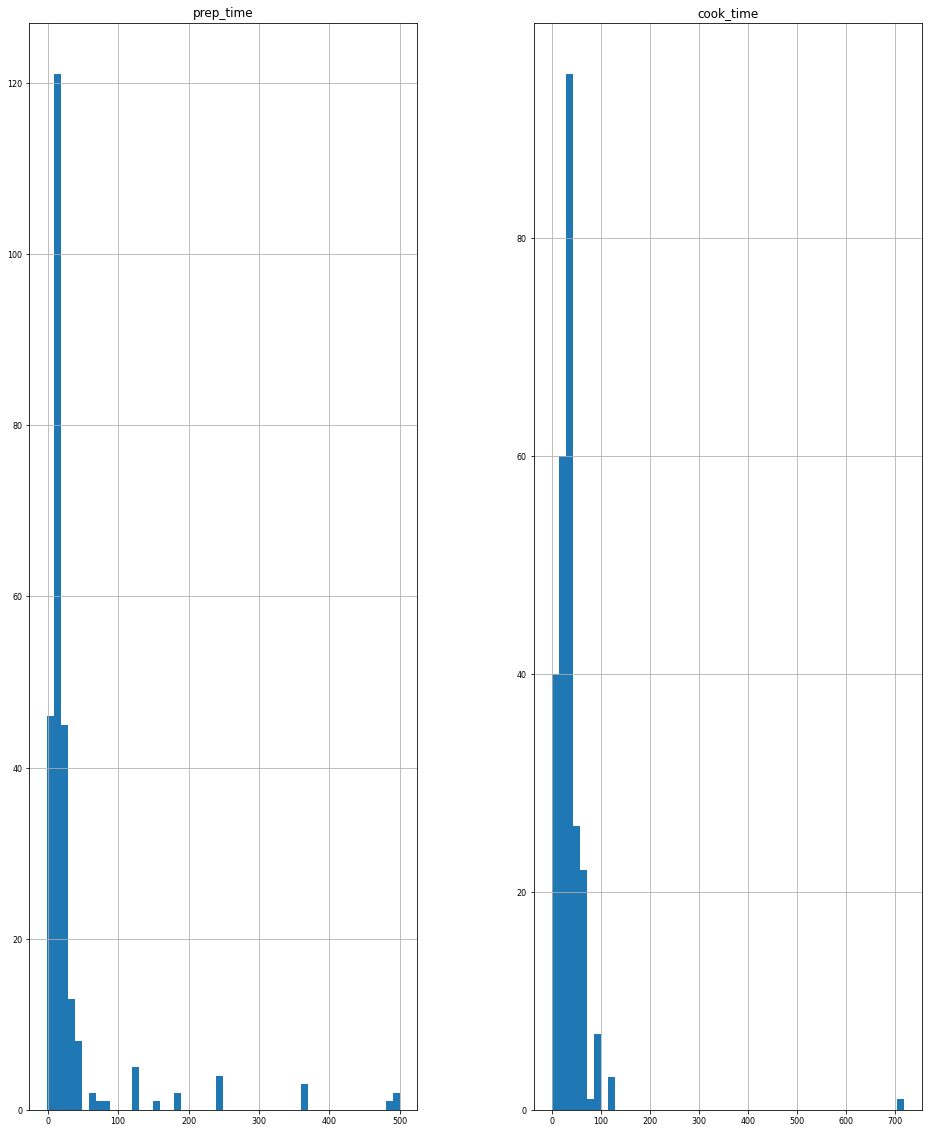

In [17]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


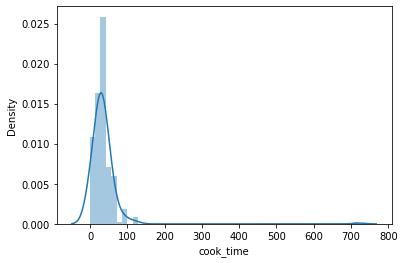

In [18]:
sns.distplot(df['cook_time']);

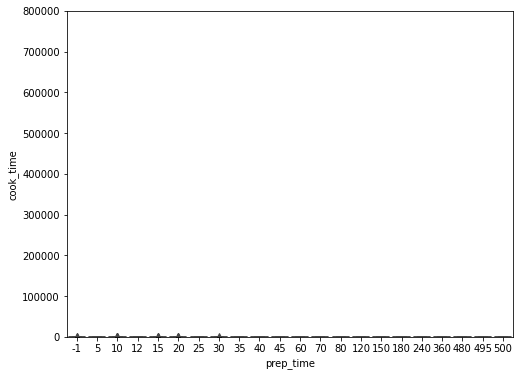

In [19]:
#box plot overallqual/saleprice
var = 'prep_time'
data = pd.concat([df['cook_time'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="cook_time", data=data)
fig.axis(ymin=0, ymax=800000);

In [21]:
var = 'prep_time'
data = pd.concat([df_train['cook_time'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="cook_time", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

NameError: name 'df_train' is not defined

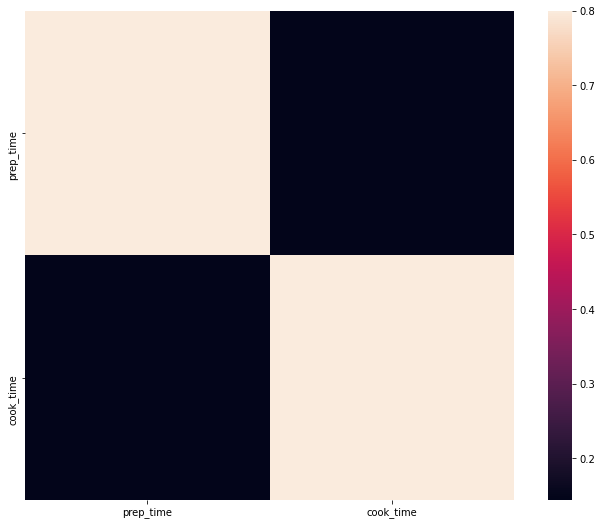

In [22]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

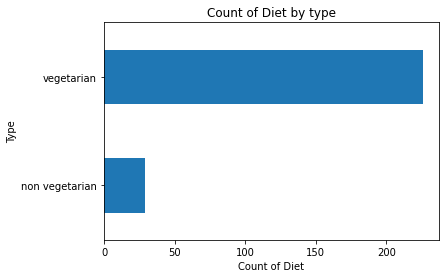

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the count per main artist, sort in descending order and plot
df['diet'].value_counts().sort_values().plot(kind='barh')
# Add axes labels and title and plot
plt.title('Count of Diet by type')
plt.ylabel('Type')
plt.xlabel('Count of Diet')
plt.show()

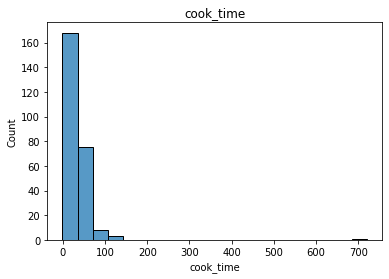

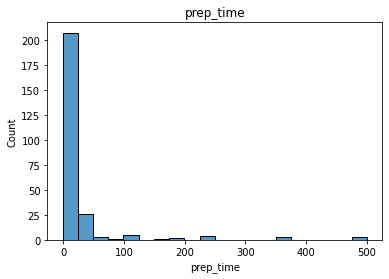

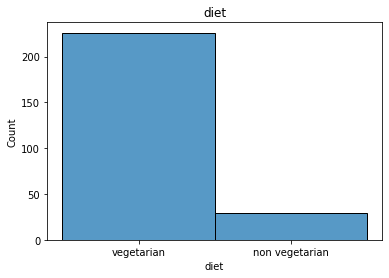

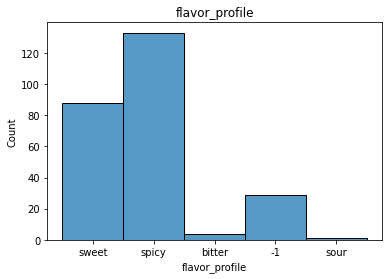

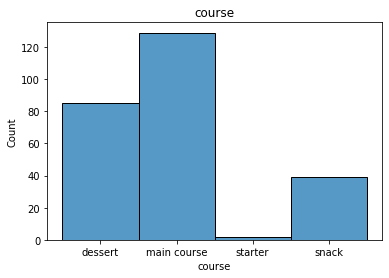

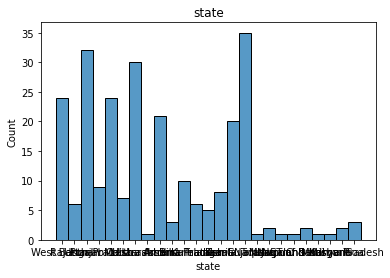

In [38]:
# Define a list of interesting columns of numerical data
interesting_columns = ['cook_time', 'prep_time', 'diet', 'flavor_profile','course','state']

# Loop through this list, creating a histogram of each one
for col in interesting_columns:

    # Plot
    sns.histplot(x=col, data=df, bins=20)
    plt.title(col)
    plt.show()

    print('\n')

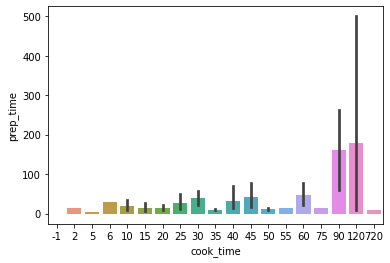

In [40]:
sns.barplot(x='cook_time', y='prep_time', data=df);

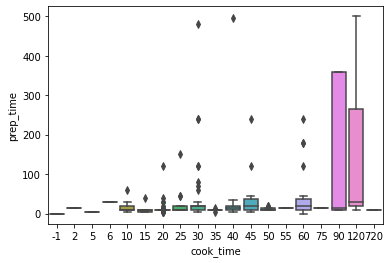

In [41]:
sns.boxplot(x='cook_time', y='prep_time', data=df);

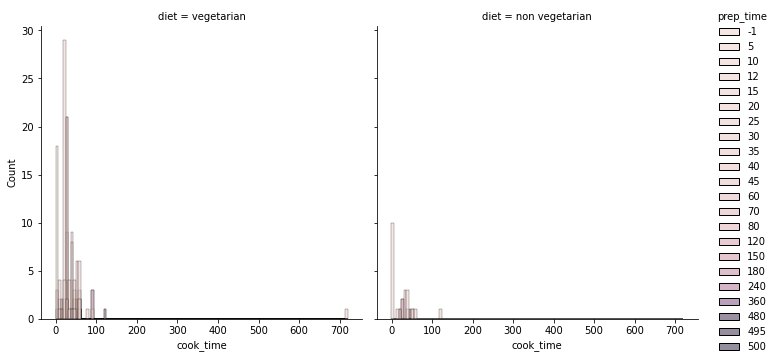

In [42]:
sns.displot(x='cook_time', hue='prep_time', col='diet', data=df)
plt.show()